In [1]:
#importing libraries for Data Analysis & Visualization
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
! pip  install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
#Downloading Competitions dataset
! kaggle competitions download titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 28.5MB/s]


In [7]:
! unzip titanic

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [108]:
! rm titanic.zip

rm: cannot remove 'titanic.zip': No such file or directory


In [203]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv('/content/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Categorical features [nominal, ordinal, ratio, or interval based]
Categorical: Survived, Sex, and Embarked. 
Ordinal: Pclass
### Numerical features [discrete, continuous, or timeseries]
Continous: Age, Fare. Discrete: SibSp, Parch

In [204]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [205]:
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [206]:
test_ids = test_data["PassengerId"] #we will equire this later when creating submission file

In [207]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [208]:
#cleaning data, dropping colmns & dealing with null vals
def clean(data):
  data = data.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)

  cols = ['SibSp','Parch','Fare','Age']
  for col in cols:
    data[col].fillna(data[col].median(), inplace=True)

  data.Embarked.fillna('U', inplace=True) # replacing nan with 'U'
  return data 

train_data = clean(train_data)
test_data = clean(test_data)  


In [209]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [210]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [211]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [212]:
def mapping(data):
    data['Sex'] = data['Sex'].map({'male':1, 'female':0})
    data['Embarked'] = data['Embarked'].map({'S':1, 'C':2, 'Q':3, 'U':4})

    return data

train_data = mapping(train_data)
test_data = mapping(test_data)

In [213]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


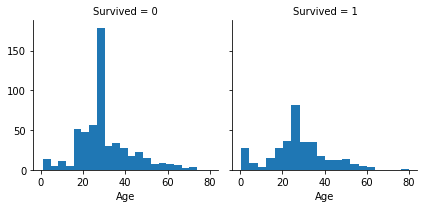

In [215]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [193]:
train_data.shape

(891, 8)

In [194]:
test_data.shape

(418, 7)

# Model

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = train_data['Survived']
x = train_data.drop(['Survived'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [218]:
lgr = LogisticRegression().fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [219]:
predictions = lgr.predict(x_test)

In [220]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7988826815642458

In [221]:
submission_pred = lgr.predict(test_data)

In [222]:
df = pd.DataFrame({'PassengerId':test_ids.values,
                   "Survived":submission_pred})

In [223]:
df.to_csv('Submission.csv', index=False)